# **Meng-Import Library**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# **Masukkan Data**

In [15]:
data = np.array([[1, 3, 5.88], [2, 6, 4.23], [3, 9, 6.93], [4, 12, 8.21], [5, 15, 9.03], [6, 18, 22.03], [7, 21, 23.95], [8, 24, 37.56], [9, 27, 45.02], [10, 30, 48.43]])
X = data[:, 1:]
y = data[:, 2]

# **Memisahkan Data**

In [16]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Membuat Model**

In [17]:
# Buat model
model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(8))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               384       
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 18)                594       
                                                                 
 dense_16 (Dense)            (None, 8)                 152       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 11,475
Trainable params: 11,475
Non-trai

# **Mengkompilasi Model**

In [19]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.MeanAbsoluteError()])

# **Fitting Model**

In [20]:
history = model.fit(X, y, epochs=500, batch_size=8, verbose=2)

Epoch 1/500
2/2 - 2s - loss: 904.3449 - mean_absolute_error: 23.9824 - 2s/epoch - 902ms/step
Epoch 2/500
2/2 - 0s - loss: 790.9427 - mean_absolute_error: 22.4138 - 18ms/epoch - 9ms/step
Epoch 3/500
2/2 - 0s - loss: 718.8414 - mean_absolute_error: 21.2891 - 15ms/epoch - 8ms/step
Epoch 4/500
2/2 - 0s - loss: 676.2008 - mean_absolute_error: 20.5853 - 21ms/epoch - 10ms/step
Epoch 5/500
2/2 - 0s - loss: 653.7916 - mean_absolute_error: 20.1906 - 17ms/epoch - 9ms/step
Epoch 6/500
2/2 - 0s - loss: 637.7028 - mean_absolute_error: 19.9106 - 17ms/epoch - 9ms/step
Epoch 7/500
2/2 - 0s - loss: 620.5613 - mean_absolute_error: 19.6178 - 17ms/epoch - 8ms/step
Epoch 8/500
2/2 - 0s - loss: 596.5099 - mean_absolute_error: 19.2214 - 19ms/epoch - 9ms/step
Epoch 9/500
2/2 - 0s - loss: 568.5374 - mean_absolute_error: 18.7322 - 15ms/epoch - 7ms/step
Epoch 10/500
2/2 - 0s - loss: 534.5033 - mean_absolute_error: 18.1557 - 16ms/epoch - 8ms/step
Epoch 11/500
2/2 - 0s - loss: 496.7447 - mean_absolute_error: 17.485

# **Membuat Grafik Loss Training**

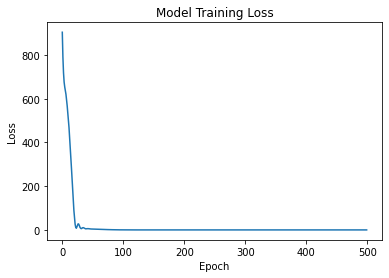

In [21]:
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# **Membuat Model Predict**

1/1 [==============================] - 0s 73ms/step


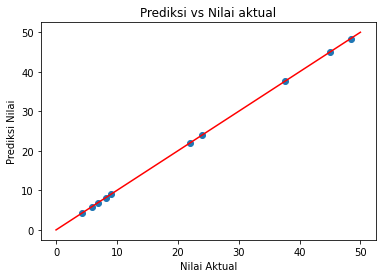

In [22]:
y_pred = model.predict(X)
plt.scatter(y, y_pred)
plt.plot([0,50], [0,50], 'r')
plt.title('Prediksi vs Nilai aktual')
plt.ylabel('Prediksi Nilai')
plt.xlabel('Nilai Aktual')
plt.show()

# **Membuat Tes Error**

In [24]:
test_loss, error_correct = model.evaluate(X_test, y_test)
print(f'Error Correction: {error_correct*100: .2f} %')

1/1 [==============================] - 0s 27ms/step - loss: 0.0010 - mean_absolute_error: 0.0318
Error Correction:  3.18 %
